In [2]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import timeit 
import dask
# Note install catopy and shapely from Gohlke's wheels using pip
import cartopy.crs as ccrs
import bokeh.plotting as bk
# plotly dies not seem to have a Python 3.5 combatible version, unfortunately.

   # Loading dataset

In [3]:
fn_chl = 'data/chl_a/*.nc'
chl =  xr.open_mfdataset(fn_chl)

# Subsetting a region: Baltic Sea

In [4]:
# For the sake of the example, we selct two arrays from the same data set, chorophyll a and the log10 bias.
chla  = chl.chlor_a.loc[dict(lat=slice(65.,50.),lon=slice(7.,30.))]
chl_rms = chl.chlor_a_log10_bias.loc[dict(lat=slice(65.,50.),lon=slice(7.,30.))]


In [5]:
chla.load()
chl_rms.load()

<xarray.DataArray 'chlor_a_log10_bias' (time: 12, lat: 360, lon: 552)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ..., 
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.00112988, -0.00112988, -0.00671398, ...,         nan,
                 nan,         nan],
        [-0.00126461, -0.00126461, -0.00209977, ...,         nan,
                 nan,         nan],
        [-0.00375677, -0.00375677, -0.00132567, ...,         nan,
                 nan,         n

# Correlation Analysis

In [6]:
# defining method to calculate cross-correlation between two data-sets along a given axis.
def mycorr(x,y,dim=None):
    return (((x-x.mean(dim=dim))*(y-y.mean(dim=dim))).sum(dim=dim)/x.count(dim=dim))/(x.std(dim=dim)*y.std(dim=dim))

In [7]:
# calling the function
corr_chla = mycorr(chla,chl_rms,dim="time")

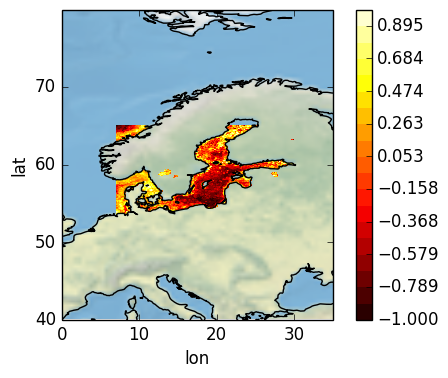

In [8]:
# plotting the result as a 2D overlay on a map with coastlines. The normalized correlation in time varies between -1 and 1

map_extent = [0, 35, 40, 80]
dtick = 10.
crs = ccrs.NorthPolarStereo()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines('50m')
ax.set_extent(map_extent, ccrs.PlateCarree())  
ax.set_xticks(np.arange(map_extent[0],map_extent[1],dtick), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(map_extent[2],map_extent[3],dtick), crs=ccrs.PlateCarree())
corr_chla.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels = np.linspace(-1.,1.,20.),cmap="hot")


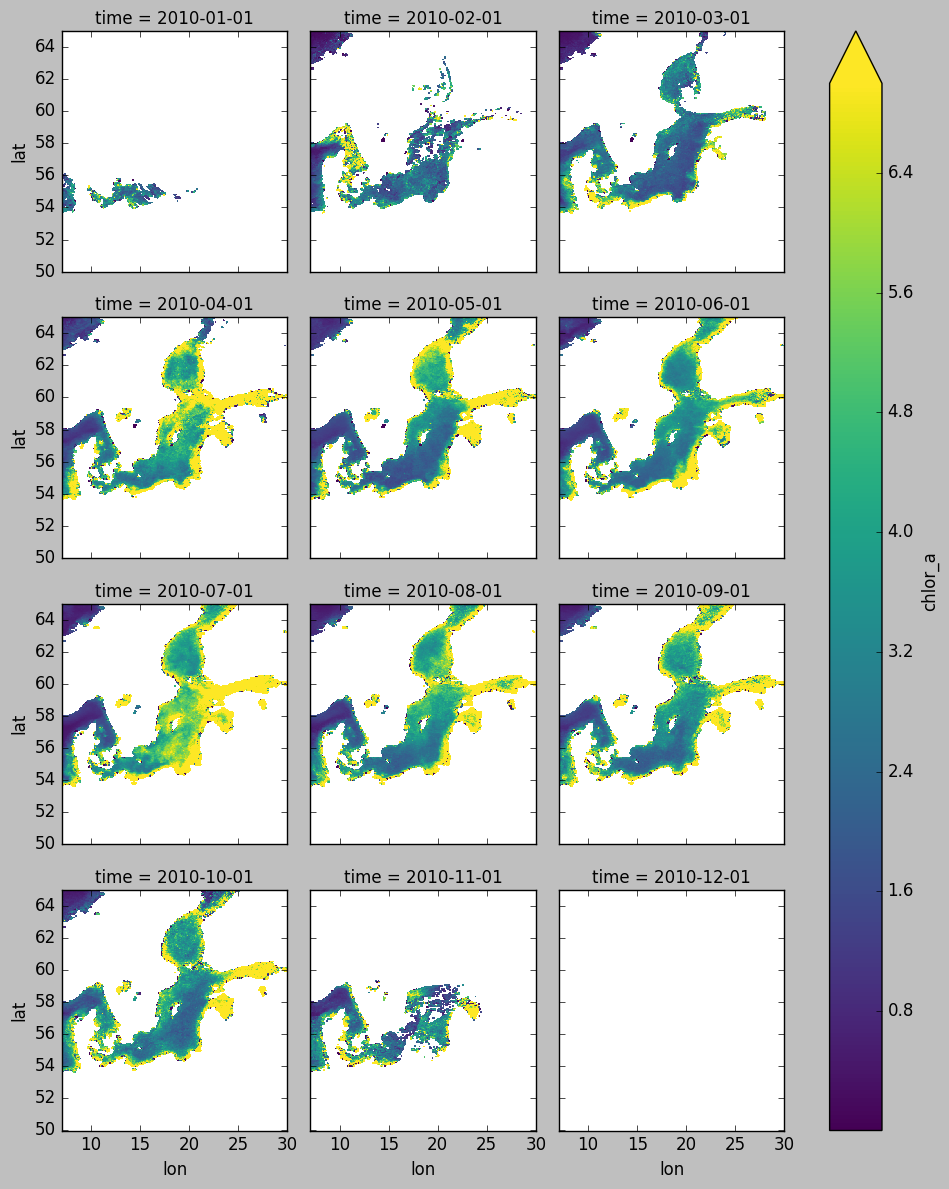

In [9]:
# monthly plot of chla only, standard xarray plotting
chla.plot(x='lon', y='lat', col='time', col_wrap=3, vmax = 7)

In [10]:
def plot_TimeSeries(data,lat,lon,tdim = "time", latdim="lat",londim="lon", xlabel = None, ylabel =None, title=None):
    xx = data.sel(**{latdim : lat, londim :lon}, method='nearest')
    y = xx.values
    t = xx[tdim].values
    y_mean = data.mean(dim=[latdim,londim]).values
    # output to static HTML file:
    bk.output_notebook()

    # create a new plot
    TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

    p = bk.figure(
       tools=TOOLS, title=title,
       x_axis_label=xlabel, y_axis_label=ylabel, x_axis_type="datetime"
    )

    # add some renderers
    p.line(t, y, legend='Time Series at Latitude '+str(lat)+', Longitude '+str(lon))
    p.line(t, y_mean, legend='Mean in the entire region', color="red")
    # show the results
    bk.show(p)

In [83]:
llat = 55.
llon = 11.
plot_TimeSeries(chla,llat,llon, title="MyFigure", xlabel = "Time", ylabel = "Chl a")


Loading BokehJS ...

In [78]:
tdim = "time"

In [81]:
xx[tdim].values

array(['2010-01-01T01:00:00.000000000+0100',
       '2010-02-01T01:00:00.000000000+0100',
       '2010-03-01T01:00:00.000000000+0100',
       '2010-04-01T02:00:00.000000000+0200',
       '2010-05-01T02:00:00.000000000+0200',
       '2010-06-01T02:00:00.000000000+0200',
       '2010-07-01T02:00:00.000000000+0200',
       '2010-08-01T02:00:00.000000000+0200',
       '2010-09-01T02:00:00.000000000+0200',
       '2010-10-01T02:00:00.000000000+0200',
       '2010-11-01T01:00:00.000000000+0100',
       '2010-12-01T01:00:00.000000000+0100'], dtype='datetime64[ns]')

In [13]:
dd="time"

In [15]:
chla.sel([dd]="2010-01-01")

SyntaxError: keyword can't be an expression (<ipython-input-15-f6731be1d1ad>, line 1)

In [16]:
[dd]

['time']

In [20]:
 dd = {"var": "lat" }

In [21]:
dd

{'var': 'lat'}

In [23]:
dd["var"]

'lat'

In [94]:
lt = 55.
mdict = {'lat' : 55., 'method' : "nearest"}
xx = chla.sel( **mdict)

In [95]:
xx

<xarray.DataArray 'chlor_a' (time: 12, lon: 552)>
array([[ 2.24287724,  2.24287724,  2.04543638, ...,         nan,
                nan,         nan],
       [ 1.37784815,  1.37784815,  1.14025509, ...,         nan,
                nan,         nan],
       [ 1.28343582,  1.28343582,  1.18412781, ...,         nan,
                nan,         nan],
       ..., 
       [ 2.51018214,  2.51018214,  1.9102695 , ...,         nan,
                nan,         nan],
       [ 3.21013808,  3.21013808,  3.13101649, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lon      (lon) float32 7.02083 7.0625 7.10417 7.14583 7.1875 7.22917 ...
    lat      float32 55.0208
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...
Attributes:
    long_name: Chlorophyll-a concentration in seawater (not log-transformed), generated by SeaDAS using OC4v6 for SeaWiFS
    units: 

In [90]:
latdim = "lat"
londim = "lon"

In [50]:
chla.sel(lat = 55., method='nearest', tolerance=None)

<xarray.DataArray 'chlor_a' (time: 12, lon: 552)>
array([[ 2.24287724,  2.24287724,  2.04543638, ...,         nan,
                nan,         nan],
       [ 1.37784815,  1.37784815,  1.14025509, ...,         nan,
                nan,         nan],
       [ 1.28343582,  1.28343582,  1.18412781, ...,         nan,
                nan,         nan],
       ..., 
       [ 2.51018214,  2.51018214,  1.9102695 , ...,         nan,
                nan,         nan],
       [ 3.21013808,  3.21013808,  3.13101649, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lon      (lon) float32 7.02083 7.0625 7.10417 7.14583 7.1875 7.22917 ...
    lat      float32 55.0208
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...
Attributes:
    long_name: Chlorophyll-a concentration in seawater (not log-transformed), generated by SeaDAS using OC4v6 for SeaWiFS
    units: 